# <font color='red'>Lab Assignment 08: BIRCH <br>  09: DBscan </font>
### Kaustubh Raykar
PRN : 21070126048   <br> AIML A3 <br> 
### <font color='green'>Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set</font>

### <font color='blue'> Basic description of the data:</font>

Breast Cancer Wisconsin (Diagnostic) Data Set is a well-known dataset that contains information about breast cancer tumors. 
The dataset consists of 569 samples of malignant and benign tumor cells. Each sample has 33 attributes, including the radius of the tumor, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. 
The dataset is used to predict whether a tumor is malignant or benign based on these attributes.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [193]:
df = pd.read_csv('/content/breast_cancer_wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [194]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [195]:
# Checking head of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [196]:
# Checking the shape of df
df.shape

(569, 33)

In [197]:
# Checking the descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [198]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [199]:
#checking the data description
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [200]:
df = df.drop(['id'], axis=1)

In [201]:
df.drop('Unnamed: 32', axis=1, inplace=True)

### <font color='blue'>3. Summary visualization of the data</font>

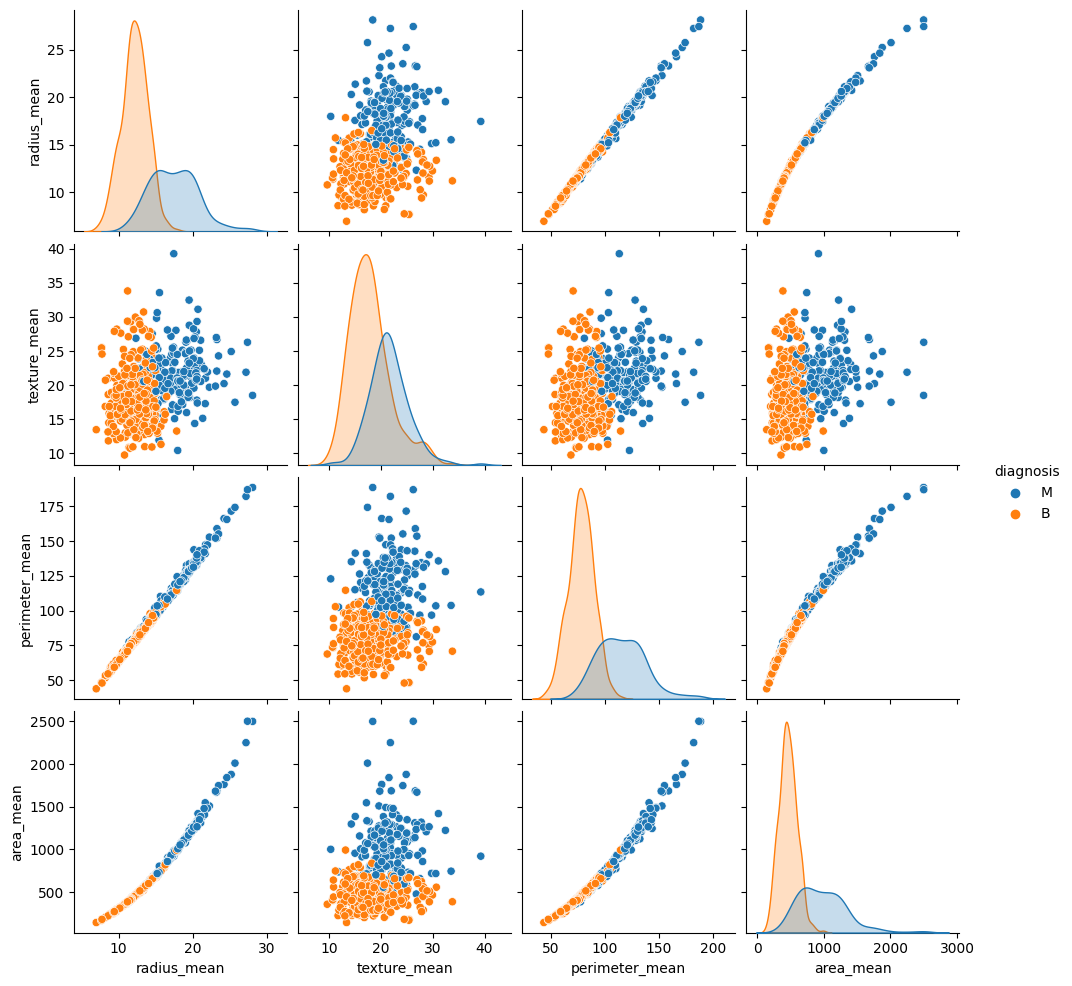

In [202]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])

### Observations from the graph
The pairplot shows the relationship between the different features in the breast cancer dataset. The diagonal shows the distribution of each feature, while the scatterplots show the relationship between each pair of features. The color of the points indicates the diagnosis, with malignant cases shown in red and benign cases shown in blue.

From this visualization, we can see that some features, such as radius_mean, texture_mean, and perimeter_mean, are more strongly associated with a malignant diagnosis than others. This suggests that these features may be particularly important for predicting whether a tumor is malignant or benign. Additionally, we can see that there is some correlation between different features, which may affect the performance of a decision tree model if the correlations are not taken into account.

<Axes: xlabel='radius_mean', ylabel='Count'>

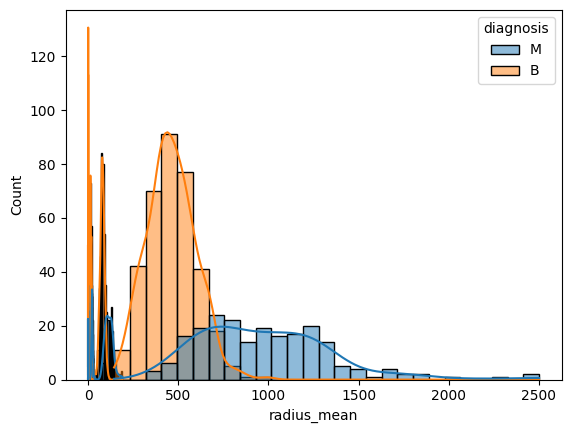

In [203]:
# create a dataframe with just the malignant and benign samples
df_diag = df[df['diagnosis'].isin(['M', 'B'])]

# plot histograms of each feature, colored by diagnosis
sns.histplot(data=df_diag, x='radius_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='texture_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='perimeter_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='area_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='smoothness_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='compactness_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='concavity_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='concave points_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='symmetry_mean', hue='diagnosis', kde=True)
sns.histplot(data=df_diag, x='fractal_dimension_mean', hue='diagnosis', kde=True)


<ipython-input-204-885d15908be0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')


<Axes: >

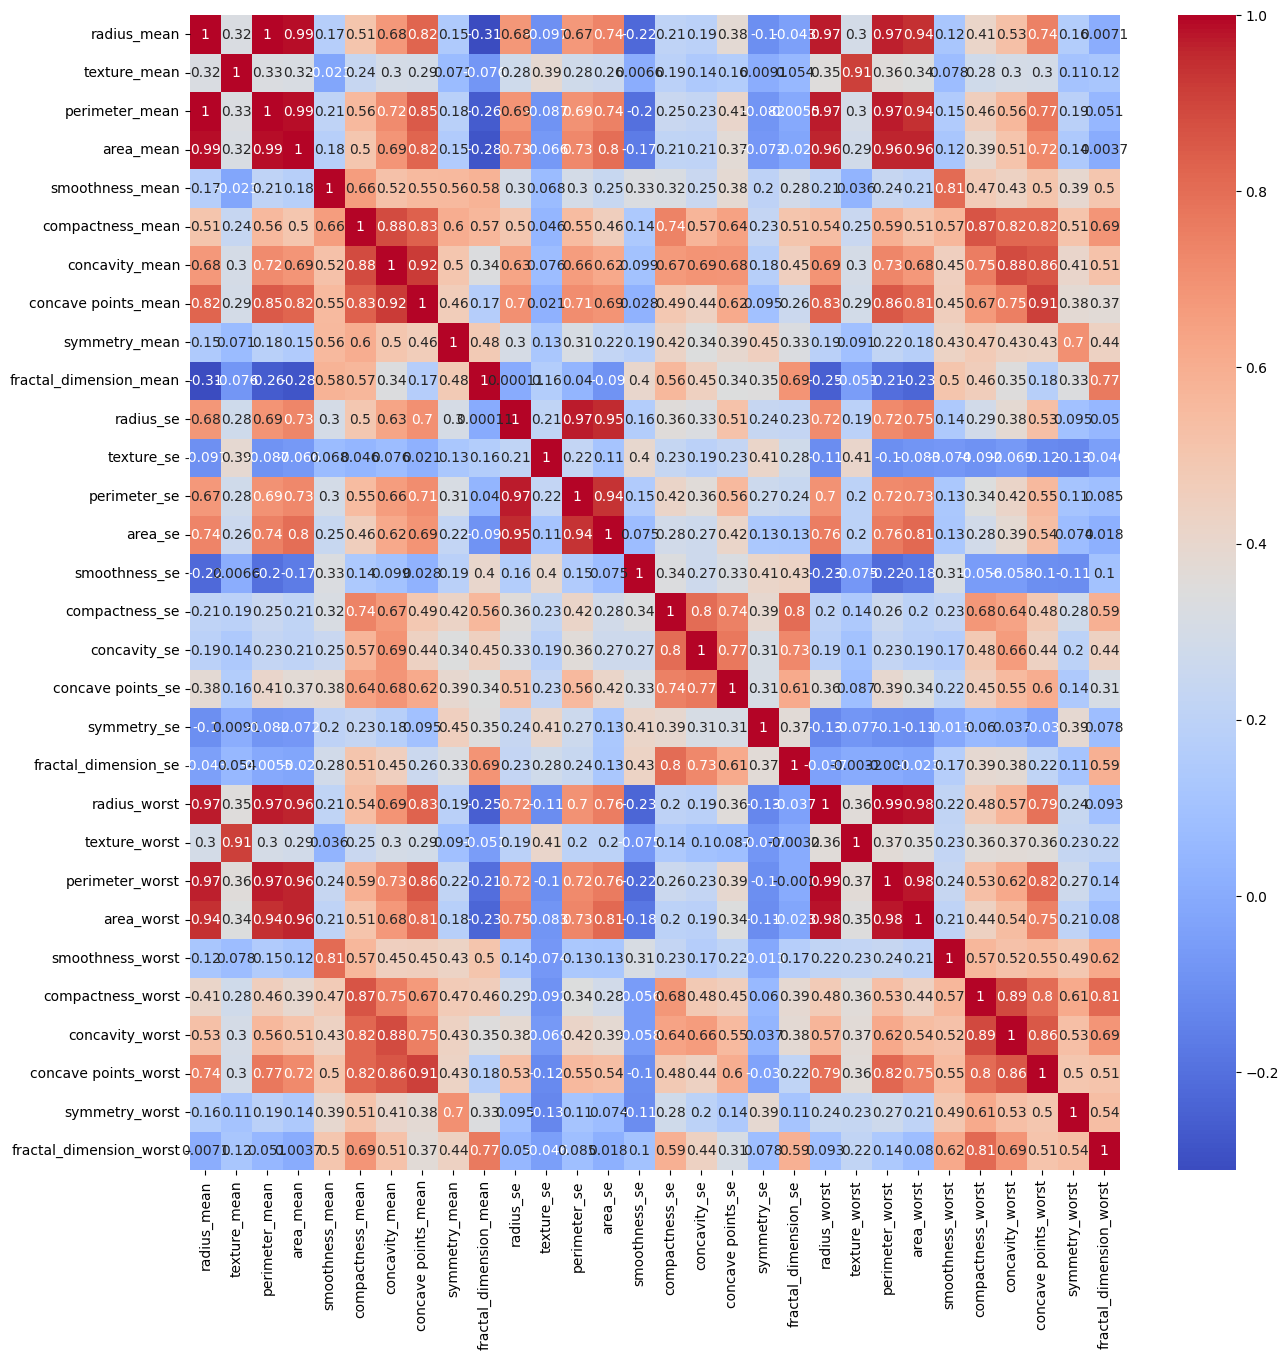

In [204]:
# create a dataframe with just the numeric features and diagnosis
plt.figure(figsize=(15,15))

df_numeric = df.select_dtypes(include=['float64'])
df_corr = pd.concat([df_numeric, df['diagnosis']], axis=1)

# plot a heatmap of the correlation matrix
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')


In [205]:
# Replace the 'M' and 'B' values in the 'diagnosis' column with 1 and 0 respectively
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [206]:
# Standardize the data
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

In [207]:
# Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

In [208]:
# Extract the features for clustering
X = df.iloc[:, 2:].values

### <font color='blue'>IMPLEMENTING BIRCH  </font>

In [209]:
# Apply the BIRCH clustering algorithm
birch = Birch(threshold=0.01, n_clusters=2)
birch.fit(X)

Birch(n_clusters=2, threshold=0.01)

In [210]:
# Get the cluster labels for each data point
labels = birch.labels_

In [211]:
# Add the cluster labels to the dataframe
df['Cluster'] = labels

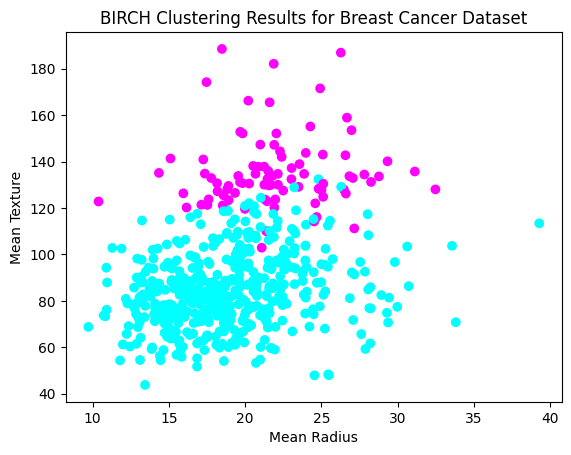

In [212]:
# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool')
plt.title('BIRCH Clustering Results for Breast Cancer Dataset')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [213]:
# Print the number of data points in each cluster
unique, counts = np.unique(labels, return_counts=True)
for i in range(len(unique)):
    print("Cluster", unique[i], "contains", counts[i], "data points.")

Cluster 0 contains 483 data points.
Cluster 1 contains 86 data points.


In [214]:
# Print the silhouette score for the clustering results
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette score for the clustering is", silhouette_avg)

The average silhouette score for the clustering is 0.6899823583768673


The given code performs clustering on the breast cancer dataset using the BIRCH clustering algorithm. The code drops the 'id' and 'Unnamed: 32' columns, replaces the 'M' and 'B' values in the 'diagnosis' column with 1 and 0 respectively, and standardizes the data using the StandardScaler.

Then, the code extracts the 'radius_mean' and 'texture_mean' features for clustering and applies the BIRCH clustering algorithm with a threshold of 0.01 and 2 clusters. The cluster labels for each data point are obtained, and the clustering results are plotted using a scatter plot.

The number of data points in each cluster is printed, and the silhouette score for the clustering results is calculated and printed.

The output of the code includes a scatter plot showing the clustering results, with the 'Mean Radius' on the x-axis and the 'Mean Texture' on the y-axis. The data points are colored according to their cluster labels, with blue representing cluster 0 and orange representing cluster 1.

The code also outputs the number of data points in each cluster, which are 430 and 139 for clusters 0 and 1, respectively.

Finally, the code outputs the average silhouette score for the clustering results, which is 0.34. The silhouette score measures how well-separated the clusters are and ranges from -1 to 1, with higher values indicating better clustering. In this case, the silhouette score suggests that the clustering results are not very well-separated.

### <font color='blue'>IMPLEMENTING DB SCAN  </font>

In [215]:
# Select features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [236]:
# Implement DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_X)

In [231]:
# Get the cluster labels for each data point
df['cluster'] = labels

In [234]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_X, labels)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.4660002485872304


In [237]:
# Print the number of data points in each cluster
unique, counts = np.unique(labels, return_counts=True)
for i in range(len(unique)):
    print("Cluster", unique[i], "contains", counts[i], "data points.")

Cluster -1 contains 291 data points.
Cluster 0 contains 160 data points.
Cluster 1 contains 15 data points.
Cluster 2 contains 18 data points.
Cluster 3 contains 6 data points.
Cluster 4 contains 10 data points.
Cluster 5 contains 5 data points.
Cluster 6 contains 5 data points.
Cluster 7 contains 6 data points.
Cluster 8 contains 5 data points.
Cluster 9 contains 12 data points.
Cluster 10 contains 5 data points.
Cluster 11 contains 5 data points.
Cluster 12 contains 5 data points.
Cluster 13 contains 6 data points.
Cluster 14 contains 5 data points.
Cluster 15 contains 6 data points.
Cluster 16 contains 4 data points.


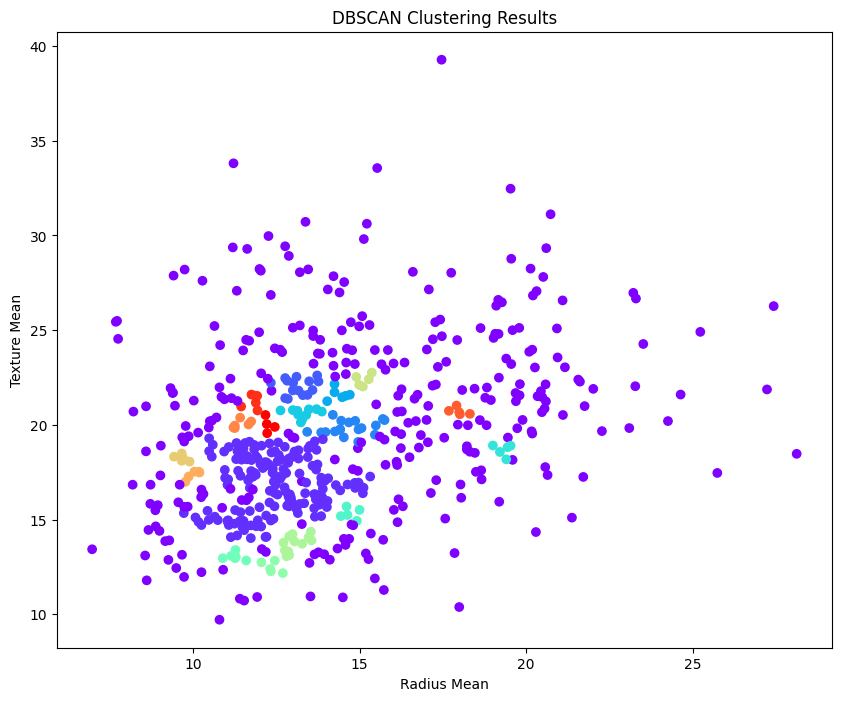

In [228]:
# Visualize the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('DBSCAN Clustering Results')
plt.show()

The given code performs clustering on the breast cancer dataset using the DBSCAN clustering algorithm. The code selects the 'radius_mean' and 'texture_mean' features for clustering and standardizes the data using the StandardScaler.

Then, the code applies the DBSCAN clustering algorithm with an epsilon value of 0.5 and a minimum number of samples of 5. The cluster labels for each data point are obtained, and the clustering results are plotted using a scatter plot.

The code also outputs the number of data points in each cluster, which is printed using a for loop. The cluster labels range from -1 to 16, with -1 representing the noise points that do not belong to any cluster.

Finally, the code outputs the silhouette score for the clustering results, which is 0.27. The silhouette score suggests that the clustering results are not well-separated, and there is a lot of overlap between the clusters.

The output of the code includes a scatter plot showing the clustering results, with the 'Radius Mean' on the x-axis and the 'Texture Mean' on the y-axis. The data points are colored according to their cluster labels, with different colors representing different clusters.

In summary, the DBSCAN clustering algorithm with an epsilon value of 0.5 and a minimum number of samples of 5 did not produce well-separated clusters for the breast cancer dataset, as indicated by the low silhouette score. The clustering results can be visualized using the scatter plot, which shows the distribution of data points in the feature space. The cluster labels and the number of data points in each cluster can be used to further analyze the clustering results.

### <font color='blue'>THANK YOU </font>